In [1]:
import pandas as pd
import pathlib

In [5]:
# set path to data
data_path = pathlib.Path('../data/raw-case-data/WHO-COVID-19-global-data.csv')

In [9]:
# read in data to dataframe
who_data = pd.read_csv(data_path)

# need new cases only for each date, for each country - Malaysia, Philippines and Malaysia

In [58]:
# need new cases only for each date, for each country - Malaysia, Philippines and Malaysia
countries = ['Malaysia', 'Philippines', 'Viet Nam']
target_data = who_data.loc[who_data['Country'].isin(countries)]

# set date columb to be datetime and set date column to index
target_data['Date_reported'] = pd.to_datetime(target_data['Date_reported'])
target_data = target_data.set_index('Date_reported')

# drop uneeded columns
target_data = target_data.drop(['Country_code','WHO_region','Cumulative_cases','New_deaths','Cumulative_deaths'], axis=1)

# Convert NaNs to 0
target_data['New_cases'] = target_data['New_cases'].fillna(0)

C:\Users\ehug0006\AppData\Local\Temp\ipykernel_19896\3771841348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Date_reported'] = pd.to_datetime(target_data['Date_reported'])


In [59]:
# Grab each country and combine
# Malaysia
mys_df = target_data.loc[target_data['Country'] == 'Malaysia']
mys_df = mys_df.rename(columns={"New_cases": "MYS"})
mys_df = mys_df.drop(['Country'], axis=1)
# Philippines
phl_df = target_data.loc[target_data['Country'] == 'Philippines']
phl_df = phl_df.rename(columns={"New_cases": "PHL"})
phl_df = phl_df.drop(['Country'], axis=1)
# Vietnam
vnm_df = target_data.loc[target_data['Country'] == 'Viet Nam']
vnm_df = vnm_df.rename(columns={"New_cases": "VNM"})
vnm_df = vnm_df.drop(['Country'], axis=1)

# join data frames


In [60]:
merge = pd.merge(mys_df,phl_df, how='inner', left_index=True, right_index=True)
case_df = pd.merge(merge, vnm_df, how='inner', left_index=True, right_index=True)

<Axes: xlabel='Date_reported'>

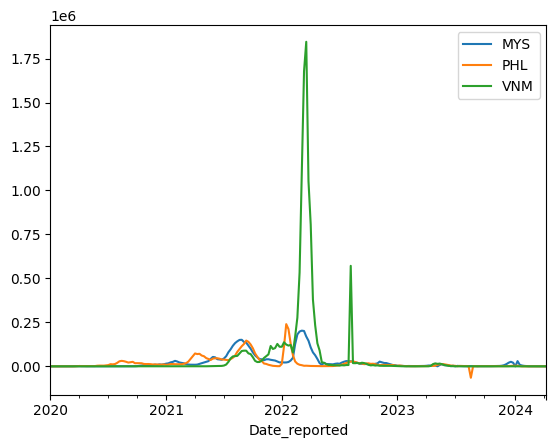

In [62]:
case_df.plot()

In [26]:
# Path to save data too
save_path = pathlib.Path('../data/target-data/case-data.csv')

In [30]:
target_data.to_csv(save_path, index = True)

In [31]:
df = pd.read_csv(save_path)

In [32]:
df

,Date_reported,Country,New_cases
0,2020-01-05,Malaysia,0.0
1,2020-01-12,Malaysia,0.0
2,2020-01-19,Malaysia,0.0
3,2020-01-26,Malaysia,4.0
4,2020-02-02,Malaysia,4.0
...,...,...,...
443,2024-03-17,Philippines,0.0
444,2024-03-24,Philippines,0.0
445,2024-03-31,Philippines,0.0
446,2024-04-07,Philippines,0.0
